In [11]:
import torch
import matplotlib.pyplot as plt

from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from tqdm import tqdm

from models.lenet import LeNet

### Utility Functions

In [12]:
def load_mnist_dataset():
    training_data = datasets.FashionMNIST(
        root='data',
        train=True,
        download=True,
        transform=ToTensor()
    )
    test_data = datasets.FashionMNIST(
        root='data',
        train=False,
        download=True,
        transform=ToTensor()
    )
    return training_data, test_data

### LeNet

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:42<00:00,  8.45s/it, Epoch Loss=306]


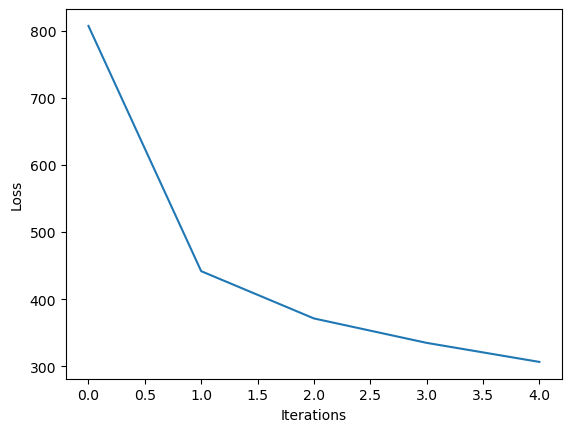

In [13]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Hyper parameters
batch_size = 100
num_epochs = 100

# Convert this to function
training_data, test_data = load_mnist_dataset()
training_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
model = LeNet(in_shape=0, out_shape=10, device=device)
optimizer = optim.Adam(model.parameters())

model.train(True)
loss_per_epoch = []
pbar = tqdm(range(num_epochs))
for _ in pbar:
    total_loss = 0
    for images, labels in training_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        pred = model(images)

        loss = model.loss(pred, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    loss_per_epoch.append(total_loss)
    pbar.set_postfix({ "Epoch Loss": total_loss })


plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(range(num_epochs), loss_per_epoch)
plt.show()